In [1]:
#!/usr/bin/env python
# coding: utf-8

# srh vs csk

**-by sindhura gundubogula**<br>
<br>
**STEP-1 import all required python libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**STEP-2 Load the dataset**

In [5]:
deliveries = pd.read_csv("deliveries.csv")
matches    = pd.read_csv("matches.csv")

In [6]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


**QUESTION1 : WHO WILL WIN THE MATCH?**

**performing exploratory data analysis only on SRH VS CSK match data**

In [10]:
sc = matches.loc[(matches['team1'] == 'Sunrisers Hyderabad') & (matches['team2'] == 'Chennai Super Kings')]
sc

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
413,414,2013,Chennai,2013-04-25,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Aleem Dar,S Das,NaN
473,474,2014,Sharjah,2014-04-27,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,DR Smith,Sharjah Cricket Stadium,AK Chaudhary,VA Kulkarni,NaN
550,551,2015,Hyderabad,2015-05-02,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Sunrisers Hyderabad,22,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,K Srinivasan,NaN
681,7939,2018,Pune,13/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium,Marais Erasmus,Yeshwant Barde,Anil Dandekar
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon
736,11332,2019,Chennai,23/04/19,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SR Watson,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni


In [11]:
cs = matches.loc[(matches['team2'] == 'Sunrisers Hyderabad') & (matches['team1'] == 'Chennai Super Kings')]
cs

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
434,435,2013,Hyderabad,2013-05-08,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,77,0,SK Raina,"Rajiv Gandhi International Stadium, Uppal",S Das,NJ Llong,NaN
506,507,2014,Ranchi,2014-05-22,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,6,DA Warner,JSCA International Stadium Complex,BNJ Oxenford,C Shamshuddin,NaN
520,521,2015,Chennai,2015-04-11,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
655,7913,2018,Hyderabad,22/04/18,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,4,0,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",Anil Chaudhary,Vineet Kulkarni,Nigel Llong
728,11324,2019,Hyderabad,17/04/19,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Sunrisers Hyderabad,0,6,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,Ian Gould,Ulhas Gandhe,C Shamshuddin


In [12]:
SC= pd.DataFrame({'team1':sc['team1'],'team2':sc['team2'],'winner':sc['winner'],'win by runs':sc['win_by_runs'],'win by wickets':sc['win_by_wickets']})  

In [13]:
CS= pd.DataFrame({'team1':cs['team1'],'team2':cs['team2'],'winner':cs['winner'],'win by runs':cs['win_by_runs'],'win by wickets':cs['win_by_wickets']})  

In [14]:
frames = [SC,CS]

In [15]:
SRH_VS_CSK = pd.concat(frames)

In [16]:
SRH_VS_CSK

,team1,team2,winner,win by runs,win by wickets
413,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,0,5
473,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,0,5
550,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,22,0
681,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,0,8
692,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,0,2
695,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,0,8
736,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,0,6
434,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,77,0
506,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,0,6
520,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,45,0


In [17]:
SRH_VS_CSK['winner'].value_counts()

Chennai Super Kings    9
Sunrisers Hyderabad    3
Name: winner, dtype: int64

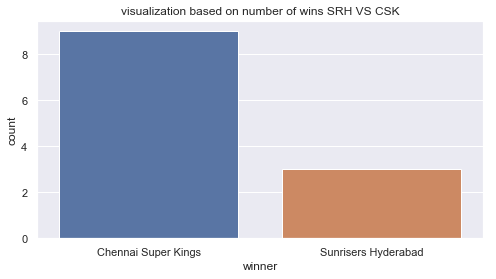

In [74]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='winner',data=SRH_VS_CSK, order = SRH_VS_CSK['winner'].value_counts().index)
plt.title('visualization based on number of wins SRH VS CSK')
plt.show()

In [20]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

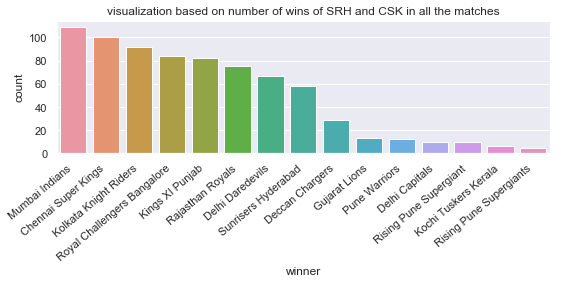

In [73]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='winner',data=matches, order = matches['winner'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('visualization based on number of wins of SRH and CSK in all the matches')
plt.show()

From the above visualizations we can observe that **CSK** has more wins compared to **SRK**

**Answer:** So without over analyzing the senario, We can conclude that CSK can be a winner as it has more number of wins 

**QUESTION 2 : HOW MANY WIDES WILL BE BOWLED?**

Create a new dataframe with only SRH and CSK BOWLING related data

In [23]:
SRH = deliveries.loc[(deliveries['bowling_team'] == 'Sunrisers Hyderabad')]
SRH

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
130,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
134,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,CH Gayle,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [24]:
CSK = deliveries.loc[(deliveries['bowling_team'] == 'Chennai Super Kings')]
CSK

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14211,61,2,Kings XI Punjab,Chennai Super Kings,1,1,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14212,61,2,Kings XI Punjab,Chennai Super Kings,1,2,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14213,61,2,Kings XI Punjab,Chennai Super Kings,1,3,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14214,61,2,Kings XI Punjab,Chennai Super Kings,1,4,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14215,61,2,Kings XI Punjab,Chennai Super Kings,1,5,JR Hopes,K Goel,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14216,61,2,Kings XI Punjab,Chennai Super Kings,1,6,JR Hopes,K Goel,JDP Oram,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14217,61,2,Kings XI Punjab,Chennai Super Kings,2,1,K Goel,JR Hopes,MS Gony,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14218,61,2,Kings XI Punjab,Chennai Super Kings,2,2,JR Hopes,K Goel,MS Gony,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14219,61,2,Kings XI Punjab,Chennai Super Kings,2,3,JR Hopes,K Goel,MS Gony,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14220,61,2,Kings XI Punjab,Chennai Super Kings,2,4,K Goel,JR Hopes,MS Gony,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [25]:
SRH = SRH.groupby('match_id')['wide_runs'].sum()

In [26]:
SRH

match_id
1         4
6         0
10        1
14       10
19        5
21        2
25        1
32        0
36        4
39        2
43        4
47        7
52        2
57        3
384       2
388       7
394       4
397       4
402       0
405       2
414       4
416       1
423       4
428       3
432       4
435       5
440       2
444       5
449       2
453       7
         ..
7903      3
7909      3
7913      4
7916      1
7918      0
7921      0
7929      2
7932      3
7935      1
7939      1
7944      2
7947      5
7950      3
7952      1
7953      3
11138     3
11144     4
11147     3
11152     2
11310     5
11313     0
11321     3
11324     3
11329     4
11332     2
11336     3
11339     6
11342     1
11345     7
11413     4
Name: wide_runs, Length: 108, dtype: int64

In [27]:
CSK = CSK.groupby('match_id')['wide_runs'].sum()
CSK

match_id
61        5
67        6
71        4
74        6
79        2
83       14
85        2
87        4
91        2
96       12
103       3
107       1
110       1
114       7
116       2
117       5
118       1
122       4
125       1
131       3
137       3
141       0
144       2
149       3
152       1
159       3
162       1
166       0
169       3
173       0
         ..
7910      8
7913      2
7917      4
7920      5
7923      6
7926     11
7928      1
7936      2
7939     10
7945      6
7949      5
7950      9
7953      6
11137     0
11141     5
11148     4
11151     4
11309     2
11314     3
11316     6
11320     8
11324     3
11330     2
11332     3
11335     3
11341     0
11346     5
11412     7
11414     2
11415     3
Name: wide_runs, Length: 164, dtype: int64

In [28]:
Total_wides_by_SRH = pd.DataFrame({'total wides per match':SRH}) 

In [29]:
Total_wides_by_SRH

,total wides per match
match_id,
1,4
6,0
10,1
14,10
19,5
21,2
25,1
32,0
36,4


In [30]:
Total_wides_by_CSK = pd.DataFrame({'total wides per match':CSK}) 

In [31]:
Total_wides_by_CSK

,total wides per match
match_id,
61,5
67,6
71,4
74,6
79,2
83,14
85,2
87,4
91,2


In [32]:
Total_wides_by_SRH['total wides per match'].value_counts()

4     23
3     19
2     15
1     15
5     12
0     11
7      4
6      4
10     2
12     1
11     1
9      1
Name: total wides per match, dtype: int64

In [33]:
Total_wides_by_CSK['total wides per match'].value_counts()

3     28
5     23
2     23
1     20
4     17
6     14
0     12
8      7
7      7
9      4
14     3
11     3
12     2
10     1
Name: total wides per match, dtype: int64

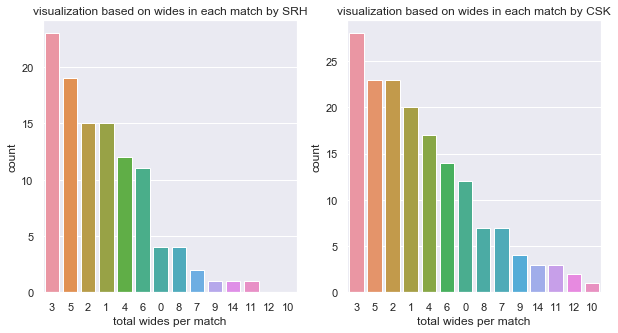

In [72]:
fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))
ax1 = sns.countplot(ax=axes[0],x='total wides per match',data=Total_wides_by_SRH,order = Total_wides_by_SRH['total wides per match'].value_counts().index)
ax1.set_title('visualization based on wides in each match by SRH')
ax2 = sns.countplot(ax=axes[1],x='total wides per match',data=Total_wides_by_CSK,order = Total_wides_by_CSK['total wides per match'].value_counts().index)
ax2.set_title('visualization based on wides in each match by CSK')
plt.show()

In [36]:
Total_wides_by_SRH.describe()

,total wides per match
count,108.000000
mean,3.314815
std,2.394105
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [37]:
Total_wides_by_CSK.describe()

,total wides per match
count,164.000000
mean,4.067073
std,2.989000
min,0.000000
25%,2.000000
50%,3.000000
75%,5.250000
max,14.000000


**answer:** using EDA, the means of SRK and CSK wides are around 4. So i conclude 4 or more wides might be bowled 

**how many runs will david warner score?**

In [38]:
warner = deliveries.loc[(deliveries['batsman'] == 'DA Warner')]

In [39]:
warner

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
1328,6,2,Sunrisers Hyderabad,Gujarat Lions,1,1,DA Warner,S Dhawan,SK Raina,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [40]:
Total_runs_per_match = warner.groupby('match_id')['total_runs'].sum()

In [41]:
Total_runs_per_match

match_id
1         17
6         78
10        52
14        28
19        77
21         5
25        47
32        52
36       127
39        30
43        40
47         6
52        72
57        39
141       52
146       36
150       24
154       39
158        5
170       15
172        0
185        6
189       57
197       34
200      111
203        4
209       34
213        0
218        6
221       32
        ... 
572        6
580       63
584       16
588       93
591       80
594       60
598        0
603       96
610       25
613       51
616       12
618       47
622       53
628       73
631       18
634       30
635       94
636       73
11138     91
11144     73
11147    102
11152     18
11310     19
11313     78
11321     51
11324     52
11329     73
11332     61
11336     43
11339    101
Name: total_runs, Length: 126, dtype: int64

In [42]:
Total_runs_DAWarner = pd.DataFrame({'total runs per match':Total_runs_per_match}) 

In [43]:
Total_runs_DAWarner 

,total runs per match
match_id,
1,17
6,78
10,52
14,28
19,77
21,5
25,47
32,52
36,127


In [44]:
Total_runs_DAWarner['total runs per match'].value_counts()

0      7
5      5
52     5
6      5
73     4
47     4
4      3
34     3
30     3
9      3
3      3
14     3
15     3
1      3
22     3
18     3
39     2
60     2
51     2
53     2
57     2
59     2
63     2
32     2
93     2
8      2
17     2
78     2
80     2
62     2
      ..
16     1
21     1
31     1
13     1
127    1
36     1
77     1
111    1
102    1
101    1
96     1
94     1
92     1
91     1
85     1
84     1
82     1
76     1
40     1
72     1
66     1
65     1
61     1
58     1
56     1
54     1
119    1
43     1
42     1
45     1
Name: total runs per match, Length: 68, dtype: int64

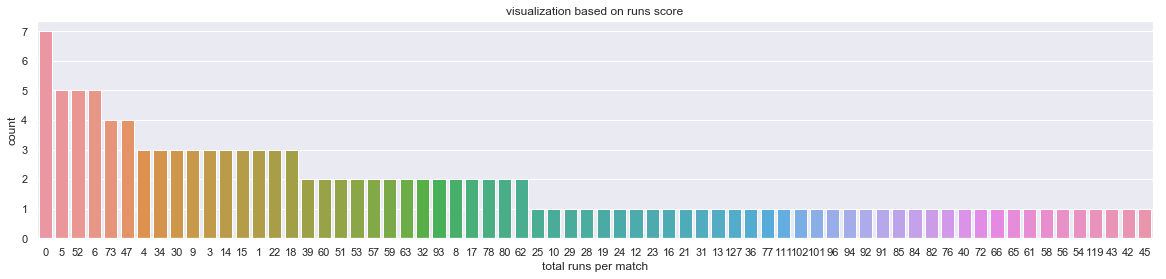

In [71]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x='total runs per match',data=Total_runs_DAWarner,order = Total_runs_DAWarner['total runs per match'].value_counts().index)
plt.title('visualization based on runs score')
plt.show()

In [47]:
Total_runs_DAWarner.describe()

,total runs per match
count,126.000000
mean,39.484127
std,31.601705
min,0.000000
25%,10.500000
50%,34.000000
75%,60.750000
max,127.000000


**Answer:** based on above conclusion,  Average most scored runs are around 40, so from given options i conclude he might score more than 40 runs in todays match

**How many runs will be scored in todays match?**

In [48]:
SRH_CSK =deliveries.loc[(deliveries['batting_team'] == 'Sunrisers Hyderabad') & (deliveries['bowling_team'] == 'Chennai Super Kings')]

In [49]:
SRH_CSK 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
97960,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,1,Q de Kock,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
97961,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,2,Q de Kock,S Dhawan,MM Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
97962,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,3,Q de Kock,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,Q de Kock,caught,M Vijay
97963,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,4,GH Vihari,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
97964,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,5,GH Vihari,S Dhawan,MM Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97965,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,6,S Dhawan,GH Vihari,MM Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97966,414,1,Sunrisers Hyderabad,Chennai Super Kings,2,1,S Dhawan,GH Vihari,JO Holder,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
97967,414,1,Sunrisers Hyderabad,Chennai Super Kings,2,2,S Dhawan,GH Vihari,JO Holder,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
97968,414,1,Sunrisers Hyderabad,Chennai Super Kings,2,3,S Dhawan,GH Vihari,JO Holder,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
97969,414,1,Sunrisers Hyderabad,Chennai Super Kings,2,4,S Dhawan,GH Vihari,JO Holder,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [50]:
Total_SRHCSK_runs_per_match = SRH_CSK .groupby('match_id')['total_runs'].sum()

In [51]:
Total_SRHCSK_runs_per_match

match_id
414      159
435      146
474      145
507      189
521      164
551      192
7913     180
7939     192
7950     148
7953     186
11324    140
11332    179
Name: total_runs, dtype: int64

In [52]:
CSK_SRH =deliveries.loc[(deliveries['bowling_team'] == 'Sunrisers Hyderabad') & (deliveries['batting_team'] == 'Chennai Super Kings')]

In [53]:
CSK_SRH 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98083,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,1,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98084,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,2,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98085,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,3,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98086,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,4,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98087,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,5,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98088,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,6,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98089,414,2,Chennai Super Kings,Sunrisers Hyderabad,2,1,M Vijay,MEK Hussey,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98090,414,2,Chennai Super Kings,Sunrisers Hyderabad,2,2,M Vijay,MEK Hussey,I Sharma,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
98091,414,2,Chennai Super Kings,Sunrisers Hyderabad,2,3,M Vijay,MEK Hussey,I Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
98092,414,2,Chennai Super Kings,Sunrisers Hyderabad,2,4,M Vijay,MEK Hussey,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [54]:
Total_CSKSRH_runs_per_match = CSK_SRH .groupby('match_id')['total_runs'].sum()

In [55]:
Total_CSKSRH_runs_per_match

match_id
414      160
435      223
474      146
507      185
521      209
551      170
7913     186
7939     181
7950     145
7953     187
11324    139
11332    185
Name: total_runs, dtype: int64

In [56]:
SRHCSK= pd.DataFrame({'Total runs':Total_SRHCSK_runs_per_match}) 

In [57]:
CSKSRH= pd.DataFrame({'Total runs':Total_CSKSRH_runs_per_match}) 

In [58]:
frames = [ SRHCSK,CSKSRH]

In [59]:
runs = pd.concat(frames)

In [60]:
runs

,Total runs
match_id,
414,159
435,146
474,145
507,189
521,164
551,192
7913,180
7939,192
7950,148


In [61]:
runs.index.unique()

Int64Index([414, 435, 474, 507, 521, 551, 7913, 7939, 7950, 7953, 11324,
            11332],
           dtype='int64', name='match_id')

In [62]:
runs_per_match = runs.groupby('match_id')['Total runs'].sum()

In [63]:
runs_per_match

match_id
414      319
435      369
474      291
507      374
521      373
551      362
7913     366
7939     373
7950     293
7953     373
11324    279
11332    364
Name: Total runs, dtype: int64

In [64]:
runs_match= pd.DataFrame({'Total runs':runs_per_match}) 

In [65]:
runs_match

,Total runs
match_id,
414,319
435,369
474,291
507,374
521,373
551,362
7913,366
7939,373
7950,293


In [66]:
runs_match.describe()

,Total runs
count,12.000000
mean,344.666667
std,37.550774
min,279.000000
25%,312.500000
50%,365.000000
75%,373.000000
max,374.000000


In [67]:
runs_match['Total runs'].value_counts()

373    3
319    1
366    1
364    1
362    1
279    1
374    1
291    1
293    1
369    1
Name: Total runs, dtype: int64

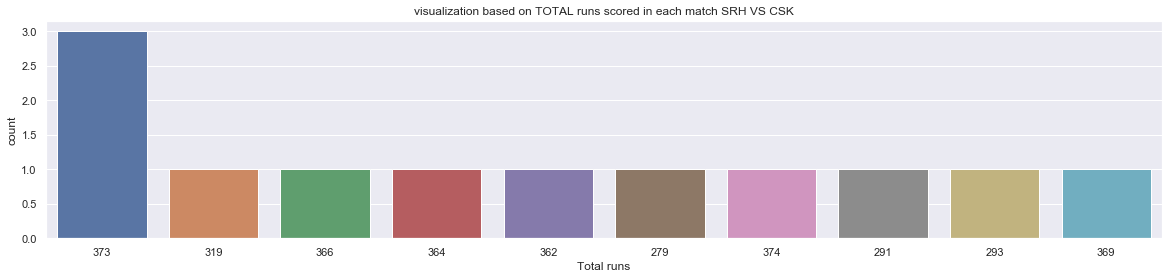

In [70]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x='Total runs',data=runs_match,order =runs_match['Total runs'].value_counts().index)
plt.title('visualization based on TOTAL runs scored in each match SRH VS CSK')
plt.show()

**answer:** by performing exploratory dataanalysis the mean is around 345, i conclude Todays total might be 345 or higher.

**end of day 3**